In [6]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import sklearn

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits


digits = load_digits()
digits.images.shape


#Show digits
import matplotlib.pyplot as plt
from matplotlib import interactive

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')
			
interactive(True)
plt.show()

X = digits.data
y = digits.target
X.shape
y.shape

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(1797,)

In [7]:
# Apply NBC on raw data
from sklearn.model_selection import train_test_split #changed cross_validation to model_selection
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB
model =GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
from sklearn.metrics import accuracy_score
ac=accuracy_score(ytest, y_model)
print("original accuracy_score :",ac)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
plt.figure(2)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

plt.show()

original accuracy_score : 0.8333333333333334


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
#Lets see how correlated pixels are - it seems that pixel next to each others are correlated
#Let check it by correlation matrix, and  plot hitmap for first  7 pixels/features
df = pd.DataFrame(X[:,0:7])
corrMatrix=df.corr()
plt.figure(3)
sns.heatmap(corrMatrix, annot=True) 
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
#Ok, now let's decorrelate the input features by applying PCA (Linear Algebra course)

pca = PCA(64)  # Change this line for experiments PCA(8,16,32)
projected = pca.fit_transform(digits.data)
Xtrain, Xtest, ytrain, ytest = train_test_split(projected, y, random_state=0)

#Plot PC1/PC2 to visualize decorrelation
fig = plt.figure(4)
ax = plt.axes(projection = "3d")
ax.scatter3D(projected[:, 0], projected[:, 1],projected[:, 2],
            c=digits.target, alpha=0.5,
            cmap=plt.cm.get_cmap("Spectral", 10)) #changed 'spectral' to "Spectral"
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2')
ax.set_zlabel('PCA component 3')
#plt.colorbar();
plt.show()
 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

decorr accuracy_score: 0.8688888888888889


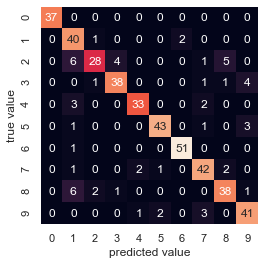

In [39]:
#Now aplly again Gaussian NBC 
model =GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

ac=accuracy_score(ytest, y_model)
print("decorr accuracy_score:",ac)
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
plt.figure(5)
sns.heatmap(mat, square=True, annot=True, cbar=False)

plt.xlabel('predicted value')
plt.ylabel('true value');
interactive(False)
plt.show()